In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
df = pd.read_csv('states2014.csv')

In [22]:
df.columns

Index(['state', 'n_incidents', 'lawtotal', 'firearm_agencies',
       'poverty_percent', 'permits_granted', 'TOT_POP', 'TOT_MALE',
       'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE', 'BA_FEMALE', 'IA_MALE',
       'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'H_MALE', 'H_FEMALE'],
      dtype='object')

In [23]:
X = df[['lawtotal', 'firearm_agencies','poverty_percent', 'permits_granted',  
         'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE', 'BA_FEMALE', 
         'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'H_MALE', 'H_FEMALE']]
y = df['n_incidents'].values.reshape(-1, 1)
print(X.shape, y.shape)

(51, 17) (51, 1)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\Oleg\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Oleg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Oleg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWa

In [26]:
model.fit(X_train_scaled, y_train_scaled)

training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9709537871019273
Testing Score: 0.6759912779681885


In [27]:
model.coef_

array([[-9.35541399e-02, -1.93920199e-02,  6.94203865e-02,
         1.13647186e-01, -2.60200548e+00,  6.99369521e+01,
        -7.34139421e+01, -6.39823263e+01,  6.78453372e+01,
        -4.05858729e+00,  6.22936298e+00, -1.95202017e+00,
         1.93859723e+00, -9.17318139e+00,  1.14438926e+01,
         6.79227612e+00, -7.08861159e+00]])

In [28]:
model_coefs_df = pd.DataFrame()
model_coefs_df['feature'] = X.columns
model_coefs_df['coef'] = model.coef_[0]
model_coefs_df

,feature,coef
0,lawtotal,-0.093554
1,firearm_agencies,-0.019392
2,poverty_percent,0.069420
3,permits_granted,0.113647
4,TOT_POP,-2.602005
5,TOT_MALE,69.936952
6,TOT_FEMALE,-73.413942
7,WA_MALE,-63.982326
8,WA_FEMALE,67.845337
9,BA_MALE,-4.058587


In [29]:
from sklearn.metrics import mean_squared_error

predictions_train = model.predict(X_train_scaled)
predictions_test = model.predict(X_test_scaled)

MSE_train = mean_squared_error(y_train_scaled, predictions_train)
MSE_test = mean_squared_error(y_test_scaled, predictions_test)


print(f"MSE train: {MSE_train}")
print(f"MSE test: {MSE_test}")

MSE train: 0.029046212898072753
MSE test: 0.3257599076849482


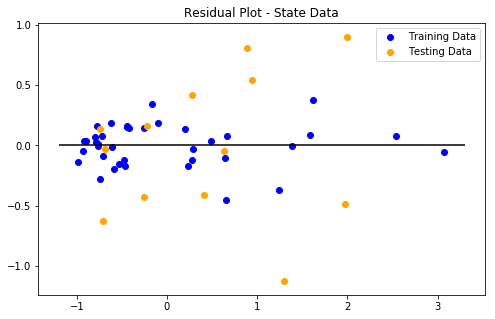

In [30]:
fig = plt.figure(figsize=(8, 5))
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=-1.2, xmax=3.3)
plt.title("Residual Plot - State Data")
plt.show()
fig.savefig('residual_state.png', dpi=fig.dpi)

In [31]:
import pandas as pd
county_df = pd.read_csv('data_by_county.csv')

In [3]:
county_df.head()

,State,state_id_y,County,Region Code,n_incidents,lawtotal,poverty_percent,firearms_agencies,TOT_POP,TOT_MALE,...,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,H_MALE,H_FEMALE
0,Alabama,AL,Autauga,1001,39,10,10.8,19,55347,26857,...,20925,21840,5003,5601,121,146,276,388,816,757
1,Alabama,AL,Baldwin,1003,85,10,10.0,60,203709,99286,...,86524,90838,9477,9954,740,765,852,1055,4873,4395
2,Alabama,AL,Barbour,1005,20,10,24.9,9,26489,14148,...,7099,6176,6728,5910,90,63,57,61,680,492
3,Alabama,AL,Bibb,1007,8,10,15.6,3,22583,12170,...,8863,8316,3117,1900,45,51,19,33,328,216
4,Alabama,AL,Blount,1009,20,10,12.1,15,57673,28495,...,27308,27926,596,488,174,203,65,99,2826,2338


In [4]:
X = county_df[['lawtotal', 'firearms_agencies','poverty_percent',   
         'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE', 'BA_FEMALE', 
         'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'H_MALE', 'H_FEMALE']]
y = county_df['n_incidents'].values.reshape(-1, 1)
print(X.shape, y.shape)

(2707, 16) (2707, 1)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [6]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\Oleg\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Oleg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Oleg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWa

In [7]:
model.fit(X_train_scaled, y_train_scaled)

training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7442887201409993
Testing Score: 0.22711524577885342


In [8]:
model_coefs_df = pd.DataFrame()
model_coefs_df['feature'] = X.columns
model_coefs_df['coef'] = model.coef_[0]
model_coefs_df

,feature,coef
0,lawtotal,0.035008
1,firearms_agencies,-0.069437
2,poverty_percent,0.036768
3,TOT_POP,-1.370109
4,TOT_MALE,60.360756
5,TOT_FEMALE,-61.036603
6,WA_MALE,-40.488759
7,WA_FEMALE,41.307039
8,BA_MALE,-11.896054
9,BA_FEMALE,14.031921


In [9]:
from sklearn.metrics import mean_squared_error

predictions_train = model.predict(X_train_scaled)
predictions_test = model.predict(X_test_scaled)

MSE_train = mean_squared_error(y_train_scaled, predictions_train)
MSE_test = mean_squared_error(y_test_scaled, predictions_test)


print(f"MSE train: {MSE_train}")
print(f"MSE test: {MSE_test}")

MSE train: 0.25571127985900066
MSE test: 0.47751366021415137


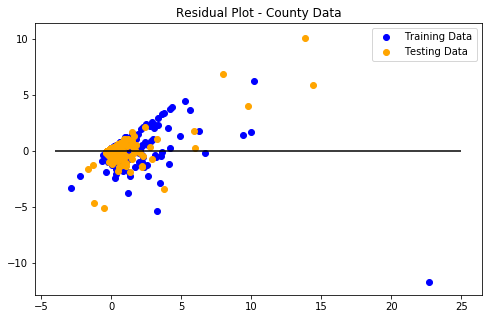

In [19]:
fig2 = plt.figure(figsize=(8, 5))

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=-4, xmax=25)
plt.title("Residual Plot - County Data")
plt.show()
fig2.savefig('residual_county.png', dpi=fig2.dpi)

In [44]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)


### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.4692109508287834, R2: 0.2405536833301517


In [45]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.48628325786834037, R2: 0.21292112131226426


In [46]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.45678032639317445, R2: 0.26067340117743243
